In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import warnings
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('./src/2022 표준지 공시지가.csv')
df

C:\Users\PC\AppData\Local\Temp\ipykernel_12924\1201907195.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./src/2022 표준지 공시지가.csv')


,일련번호,시군구,읍면동리,지번구분,본번지,부번지,시도명,시군구명,소재지,지목,...,용도지역2,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위
0,1,11110,10100,1,0003,52,서울특별시,종로구,청운동 3-52,공원,...,NaN,공원등,시가지주변 야산지대,급경사지,부정형,세로(불),493500,경기상고,북측 인근,NaN
1,2,11110,10100,1,0004,2,서울특별시,종로구,청운동 4-2,임야,...,NaN,자연림,시가지주변 야산지대,완경사지,부정형,맹지,730500,경가상고,북서측 근거리,남향
2,3,11110,10100,1,0004,15,서울특별시,종로구,청운동 4-15,대,...,NaN,단독주택,기존 주택지대,완경사지,사다리형,세로(가),4250000,경기상고,북서측 인근,북동향
3,4,11110,10100,1,0008,9,서울특별시,종로구,청운동 8-9,대,...,NaN,연립주택,일반 주택지대,급경사지,부정형,세로(가),3930000,청운중학교,서측인근,남향
4,5,11110,10100,1,0008,15,서울특별시,종로구,청운동 8-15,대,...,NaN,연립주택,기존 주택지대,급경사지,사다리형,세로(가),3855000,경기상고,서측인근,남서향
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540045,4367,50130,32026,1,1582,0,제주특별자치도,서귀포시,표선면 토산리 1582,전,...,NaN,과수원,지방도주변 농경지대,평지,사다리형,맹지,18500,토산1리노인복지회관,북측 원거리,NaN
540046,4368,50130,32026,1,1629,1,제주특별자치도,서귀포시,표선면 토산리 1629-1,전,...,NaN,전,순수 농경지대,평지,사다리형,소로한면,61000,소소름,남동측 인근,NaN
540047,4369,50130,32026,1,1766,1,제주특별자치도,서귀포시,표선면 토산리 1766-1,과수원,...,NaN,과수원,지방도주변 농경지대,완경사지,부정형,세로(가),49500,토산1리사무소,북서측 인근,NaN
540048,4370,50130,32026,1,1876,0,제주특별자치도,서귀포시,표선면 토산리 1876,과수원,...,NaN,과수원,지방도주변 농경지대,완경사지,부정형,중로한면,89000,토산1리사무소,남서측 인근,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540050 entries, 0 to 540049
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   일련번호    540050 non-null  int64  
 1   시군구     540050 non-null  int64  
 2   읍면동리    540050 non-null  int64  
 3   지번구분    540050 non-null  int64  
 4   본번지     540050 non-null  object 
 5   부번지     540050 non-null  object 
 6   시도명     540050 non-null  object 
 7   시군구명    537528 non-null  object 
 8   소재지     540050 non-null  object 
 9   지목      540050 non-null  object 
 10  면적      540050 non-null  float64
 11  용도지역1   540050 non-null  object 
 12  용도지역2   5398 non-null    object 
 13  이용상황    540050 non-null  object 
 14  주위환경    540050 non-null  object 
 15  지세명     540050 non-null  object 
 16  형상명     540050 non-null  object 
 17  도로교통    540050 non-null  object 
 18  공시지가    540050 non-null  int64  
 19  지리적위치1  540050 non-null  object 
 20  지리적위치2  515324 non-null  object 
 21  방위      20

In [4]:
df['시도명'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

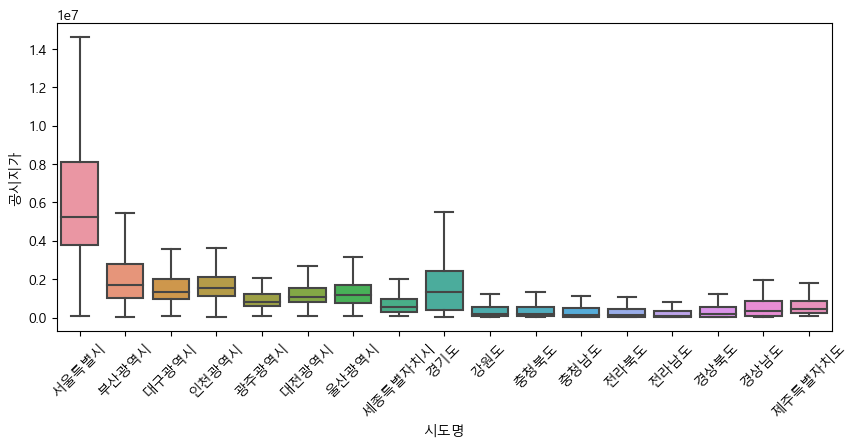

In [5]:
# showfliers=False: 이상치 제거
plt.figure(figsize=(10, 4))
sns.boxplot(x='시도명', y='공시지가', data=df[df['지목']=='대'], showfliers=False)
plt.xticks(rotation=45)
plt.show()

In [6]:
df['가격'] = df['공시지가'] * df['면적']
df.head(2)

,일련번호,시군구,읍면동리,지번구분,본번지,부번지,시도명,시군구명,소재지,지목,...,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위,가격
0,1,11110,10100,1,0003,52,서울특별시,종로구,청운동 3-52,공원,...,공원등,시가지주변 야산지대,급경사지,부정형,세로(불),493500,경기상고,북측 인근,NaN,504110250.0
1,2,11110,10100,1,0004,2,서울특별시,종로구,청운동 4-2,임야,...,자연림,시가지주변 야산지대,완경사지,부정형,맹지,730500,경가상고,북서측 근거리,남향,528370650.0


In [7]:
df.groupby('시도명')['가격'].sum().sort_values(ascending=False)

시도명
서울특별시      2.245299e+14
경기도        1.147945e+14
인천광역시      2.746758e+13
부산광역시      2.254385e+13
경상남도       1.610762e+13
대구광역시      1.375950e+13
충청남도       1.166390e+13
경상북도       1.013353e+13
울산광역시      7.068710e+12
강원도        6.939793e+12
충청북도       6.153222e+12
전라남도       6.150644e+12
대전광역시      5.897049e+12
광주광역시      5.378557e+12
전라북도       4.994940e+12
제주특별자치도    4.818541e+12
세종특별자치시    3.202565e+12
Name: 가격, dtype: float64

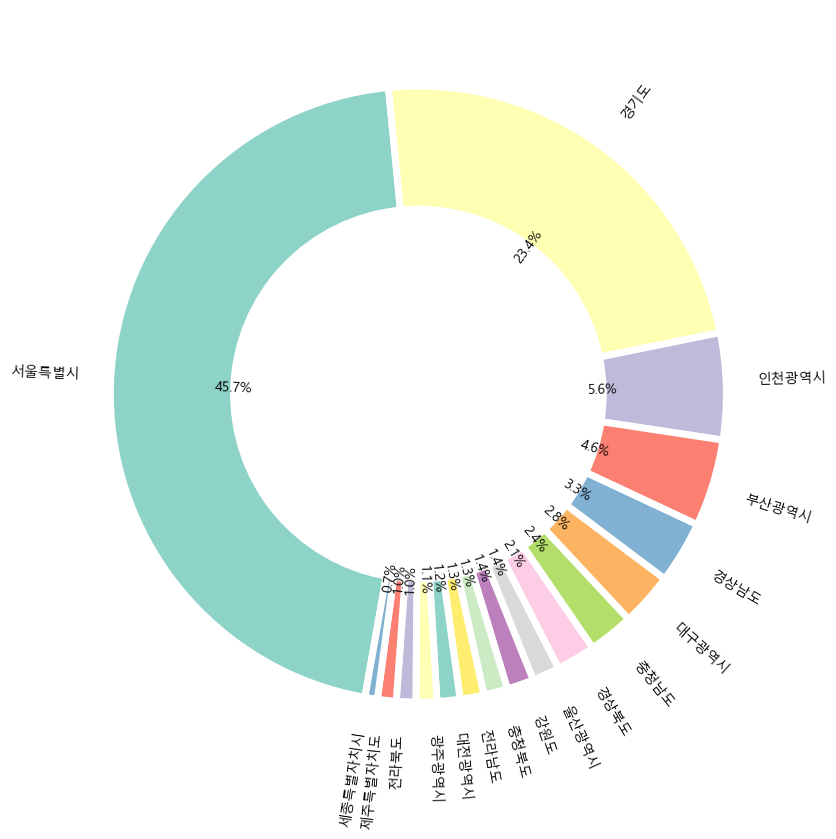

In [8]:
price_by_city = df.groupby('시도명')['가격'].sum().sort_values(ascending=False)
ratio = price_by_city.values
labels = price_by_city.index
colors = plt.get_cmap('Set3').colors
wedgeprops={'width': 0.4, 'edgecolor': 'w', 'linewidth': 5}

plt.figure(figsize=(10, 10))
patches, labels, pct_texts = plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, 
        counterclock=False, colors=colors, wedgeprops=wedgeprops, rotatelabels=True)

for label, pct_text in zip(labels, pct_texts):
    pct_text.set_rotation(label.get_rotation())

plt.show()

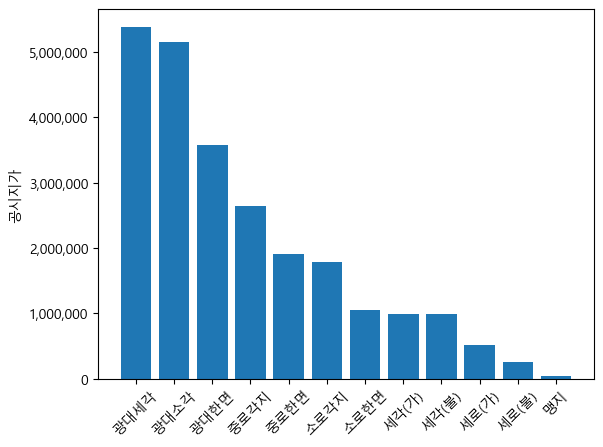

In [9]:
from matplotlib.ticker import FuncFormatter
price_by_traffic = df.groupby('도로교통')['공시지가'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(1)
ax.bar(price_by_traffic.index, price_by_traffic.values)
ax.tick_params('x', labelrotation=45)
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel('공시지가')
plt.show()


In [10]:
price_by_traffic.std()

1819382.8460398314

In [11]:
df.columns

Index(['일련번호', '시군구', '읍면동리', '지번구분', '본번지', '부번지', '시도명', '시군구명', '소재지', '지목',
       '면적', '용도지역1', '용도지역2', '이용상황', '주위환경', '지세명', '형상명', '도로교통', '공시지가',
       '지리적위치1', '지리적위치2', '방위', '가격'],
      dtype='object')

In [12]:
for c in ['주위환경', '지세명', '형상명', '도로교통']:
    tmp = df.groupby(c)['공시지가'].mean()
    print(f'{c} : 약 {tmp.std() // 10000} 만원')

주위환경 : 약 526.0 만원
지세명 : 약 42.0 만원
형상명 : 약 82.0 만원
도로교통 : 약 181.0 만원


In [13]:
df.columns

Index(['일련번호', '시군구', '읍면동리', '지번구분', '본번지', '부번지', '시도명', '시군구명', '소재지', '지목',
       '면적', '용도지역1', '용도지역2', '이용상황', '주위환경', '지세명', '형상명', '도로교통', '공시지가',
       '지리적위치1', '지리적위치2', '방위', '가격'],
      dtype='object')

In [14]:
####### 도로명주소 위도 경도 값으로 바꿔주기 ########
from geopy.geocoders import Nominatim
geo_local = Nominatim(user_agent='South Korea')

# 위도, 경도 반환하는 함수
def geocoding(address):
    try:
        geo = geo_local.geocode(address)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

In [15]:
jh = df[df['시군구명'] == '창원진해구']

In [26]:
address = '진해구' + " " + jh['소재지']

latitude = []
longitude =[]

for i in tqdm(address):
    lat, lon = geocoding(i)
    latitude.append(lat)
    longitude.append(lon)

100%|██████████| 1330/1330 [11:08<00:00,  1.99it/s]


In [71]:
longitude_arr = np.array(longitude)
latitude_arr = np.array(latitude)

mask = longitude_arr != 0
lo = longitude_arr[mask]
la = latitude_arr[mask]

address = []
for i, j in zip(longitude_arr, latitude_arr):
    address.append(str(i) + ", " + str(j))


In [72]:
price = jh['공시지가'].values

In [74]:
mask = longitude_arr != 0
lo = longitude_arr[mask]
la = latitude_arr[mask]

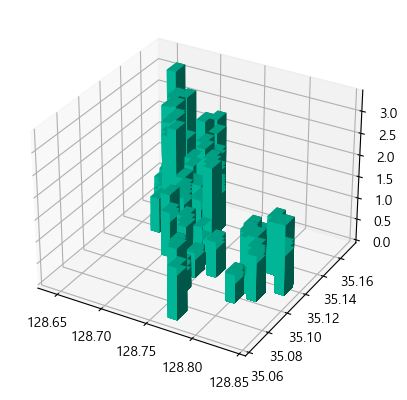

In [77]:
l = len(lo)
adjusted_price = price[:l]  # price 데이터의 길이를 l에 맞게 재조정

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.bar3d(lo, la, np.zeros(l), np.full(l, 0.01), np.full(l, 0.01), adjusted_price, color='#00ceaa')

plt.show()


In [54]:
import folium

lo = list(longitude_arr)
la = list(latitude_arr)

center = [sum(la) / len(la), sum(lo) / len(lo)]  # 중심 좌표 계산

m = folium.Map(location=center, zoom_start=12, tiles="Stamen Terrain")

tooltip = "Click me!"
for i, j in tqdm(zip(la, lo)):
    folium.Marker(
        [i, j], popup="<i>test</i>", tooltip=tooltip, icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(m)

m

1233it [00:00, 38645.48it/s]
